# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
import deltas

## Get data and classifier

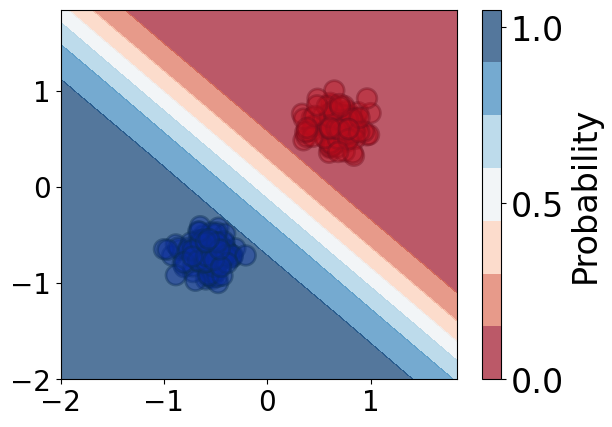

In [2]:
N1 = 100
N2 = 100
data_clf = pipeline.get_data_and_classifier(N1=N1, N2=N2)

data = data_clf['data']
clf = data_clf['clf']
m1 = data_clf['mean1']
m2 = data_clf['mean2']

## Get projection and data we need (R, D, M etc.)

R1 empirical: 0.36763234144801804
R2 empirical: 0.40228633765286104


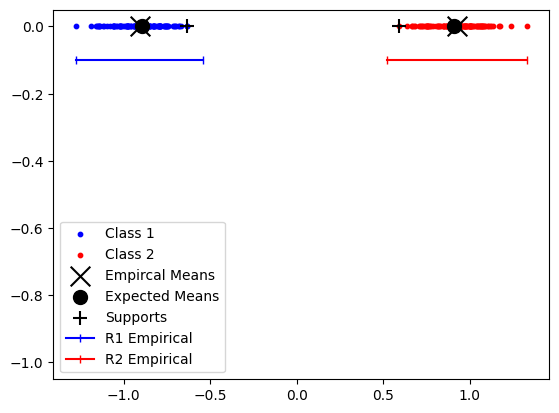

In [3]:
data_info = pipeline.data_project_and_info(
    data=data_clf['data'], m1=data_clf['mean1'], m2=data_clf['mean2'], clf=data_clf['clf'])

## set up extra parameters

In [4]:
# Costs
data_info['c1'] = 1
data_info['c2'] = 1
data_info['N1'] = N1
data_info['N2'] = N2
pipeline.print_params(data_info)

Parameters
        R:  1.3288229092004988
        N1: 100
        N2: 100
        R1: 0.36763234144801804
        R2: 0.40228633765286104
        M:  1.2255270621535332
        D:  1.8340698186325888
        C1: 1
        C2: 1


## Optimiser

delta1 : 0.9999984239011892 
delta2: 0.9999956093591567
constraint: 0.00016658495871624268 should equal 0
R1_est : 0.8996333551637881 
R2_est: 0.9342873513686311


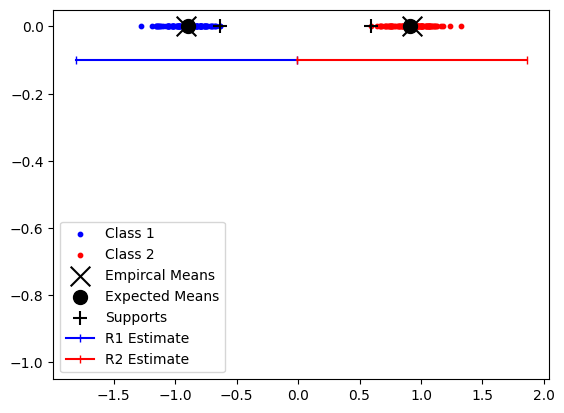

In [5]:

loss_func = deltas.scipy_optim_func   # returns tuple for (loss_func, gradient)
loss_func = deltas.loss_one_delta   # loss_func only - won't use gradient during optimisation
loss_func = lambda delta, data_info: deltas.loss(delta[0], delta[1], data_info)

contraint_func = deltas.contraint_eq7
# contraint_func = deltas.contraint_eq8

delta1_from_delta2_func = deltas.delta2_given_delta1
 
delta1, delta2 = pipeline.optimise(
    data_info, loss_func, contraint_func, num_deltas=2)